# Evolution of Opioid Overdose Death in the US
### By Michelle Ju Young Rhee | Date Modified: 3/13/2023


### Research Question: ***How has the opioid overdose deaths in the U.S. progressed from 1999 to 2019 by sex and race?***

## I. Introduction
<br> For my final project, I decided to analyze the evolution of the opioid overdose in the United States from 1999 to 2019 and delve deeper into comparing the drug overdose of varying races and sex. I felt motivated to use this opioid data file after watching a documentary about opioid overdose death and how it has rapidly grown over the past decade across the United States. I became interested in analyzing how opioid overdose has impacted varying races and sex and comparing the growth rate of each group. 

## II. Methods
<br> The data that I am using for this project was retrieved from CORGIS Opioids file (https://corgis-edu.github.io/corgis/datasets/csv/opioids/opioids.csv). This dataset was compiled by the National Institute on Drug Abuse. It contains the number of overdose deaths due to all drugs, all opioids and subsections of opioids including prescription, synthetic drug, heroin and cocaine. There are also the rate of overdose deaths due to each of these kind of opioids per 100,000 people. </br>

Let's start observing the dataset closely. I called the entire opioid dataset below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

drug=pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/opioids/opioids.csv')
drug

,Year,Number.All,Number.Opioid.Any,Number.Opioid.Prescription,Number.Opioid.Synthetic,Number.Opioid.Heroin,Number.Opioid.Cocaine,Rate.All.Total,Rate.All.Sex.Female,Rate.All.Sex.Male,...,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Heroin.Race.Hispanic,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.Hispanic,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
0,1999,16849,8050,3442,730,1960,3822,6.1,3.9,8.2,...,0.7,0.8,1.1,1.4,0.6,2.1,1.0,3.7,1.7,0.9
1,2000,17415,8407,3785,782,1842,3544,6.2,4.1,8.3,...,0.6,0.9,0.9,1.3,0.6,1.9,1.0,3.3,1.3,1.0
2,2001,19394,9496,4770,957,1779,3833,6.8,4.6,9.0,...,0.6,0.8,0.9,1.3,0.7,2.0,1.0,3.6,1.3,1.0
3,2002,23518,11920,6483,1295,2089,4599,8.2,5.8,10.6,...,0.7,0.9,1.0,1.6,0.8,2.4,1.3,4.0,1.5,1.1
4,2003,25785,12940,7461,1400,2080,5199,8.9,6.4,11.5,...,0.7,0.8,1.0,1.8,0.9,2.7,1.6,4.1,1.6,1.7
5,2004,27424,13756,8577,1664,1878,5443,9.4,6.9,11.8,...,0.7,0.6,0.7,1.9,1.0,2.8,1.7,4.3,1.4,1.6
6,2005,29813,14918,9612,1742,2009,6208,10.1,7.3,12.8,...,0.7,0.8,0.8,2.1,1.1,3.1,1.9,4.9,1.7,2.3
7,2006,34425,17545,11589,2707,2088,7448,11.5,8.2,14.8,...,0.8,0.7,0.8,2.5,1.3,3.8,2.3,5.6,1.9,1.6
8,2007,36010,18516,12796,2213,2399,6512,11.9,8.8,14.9,...,0.9,0.8,0.8,2.2,1.1,3.2,2.0,4.7,1.6,2.1
9,2008,36450,19582,13149,2306,3041,5129,11.9,8.9,14.9,...,1.2,0.8,1.0,1.7,0.9,2.5,1.6,3.4,1.3,1.5


Since I am only focusing on opioid-related overdose deaths, I refined the dataset by removing all the columns that are related to deaths due to all drugs. 

In [2]:
#redefine drug dataset by dropping following columns.
drug=drug.drop(['Number.All', 'Rate.All.Total', 'Rate.All.Sex.Female','Rate.All.Sex.Male', 'Rate.All.Race.White', 'Rate.All.Race.Black',
       'Rate.All.Race.Asian or Pacific Islander', 'Rate.All.Race.Hispanic',
       'Rate.All.Race.American Indian or Alaska Native'], axis=1)
drug

,Year,Number.Opioid.Any,Number.Opioid.Prescription,Number.Opioid.Synthetic,Number.Opioid.Heroin,Number.Opioid.Cocaine,Rate.Opioid.Any.Total,Rate.Opioid.Any.Sex.Female,Rate.Opioid.Any.Sex.Male,Rate.Opioid.Any.Race.White,...,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Heroin.Race.Hispanic,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.Hispanic,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
0,1999,8050,3442,730,1960,3822,2.9,1.4,4.3,2.8,...,0.7,0.8,1.1,1.4,0.6,2.1,1.0,3.7,1.7,0.9
1,2000,8407,3785,782,1842,3544,3.0,1.6,4.4,3.1,...,0.6,0.9,0.9,1.3,0.6,1.9,1.0,3.3,1.3,1.0
2,2001,9496,4770,957,1779,3833,3.3,1.9,4.8,3.7,...,0.6,0.8,0.9,1.3,0.7,2.0,1.0,3.6,1.3,1.0
3,2002,11920,6483,1295,2089,4599,4.1,2.6,5.7,4.7,...,0.7,0.9,1.0,1.6,0.8,2.4,1.3,4.0,1.5,1.1
4,2003,12940,7461,1400,2080,5199,4.5,2.8,6.1,5.2,...,0.7,0.8,1.0,1.8,0.9,2.7,1.6,4.1,1.6,1.7
5,2004,13756,8577,1664,1878,5443,4.7,3.1,6.3,5.7,...,0.7,0.6,0.7,1.9,1.0,2.8,1.7,4.3,1.4,1.6
6,2005,14918,9612,1742,2009,6208,5.1,3.4,6.6,6.2,...,0.7,0.8,0.8,2.1,1.1,3.1,1.9,4.9,1.7,2.3
7,2006,17545,11589,2707,2088,7448,5.9,3.9,7.8,7.3,...,0.8,0.7,0.8,2.5,1.3,3.8,2.3,5.6,1.9,1.6
8,2007,18516,12796,2213,2399,6512,6.1,4.3,8.0,7.8,...,0.9,0.8,0.8,2.2,1.1,3.2,2.0,4.7,1.6,2.1
9,2008,19582,13149,2306,3041,5129,6.4,4.4,8.4,8.2,...,1.2,0.8,1.0,1.7,0.9,2.5,1.6,3.4,1.3,1.5


While I cleared some irrelevant columns, the dataset still hides some columns due to its massive size. Thus, let's print out all the columns' names below:

In [3]:
drug.columns

Index(['Year', 'Number.Opioid.Any', 'Number.Opioid.Prescription',
       'Number.Opioid.Synthetic', 'Number.Opioid.Heroin',
       'Number.Opioid.Cocaine', 'Rate.Opioid.Any.Total',
       'Rate.Opioid.Any.Sex.Female', 'Rate.Opioid.Any.Sex.Male',
       'Rate.Opioid.Any.Race.White', 'Rate.Opioid.Any.Race.Black',
       'Rate.Opioid.Any.Race.Asian or Pacific Islander',
       'Rate.Opioid.Any.Race.Hispanic',
       'Rate.Opioid.Any.Race.American Indian or Alaska Native',
       'Rate.Opioid.Prescription.Total', 'Rate.Opioid.Prescription.Sex.Female',
       'Rate.Opioid.Prescription.Sex.Male',
       'Rate.Opioid.Prescription.Race.White',
       'Rate.Opioid.Prescription.Race.Black',
       'Rate.Opioid.Prescription.Race.Hispanic',
       'Rate.Opioid.Prescription.Race.American Indian or Alaska Native',
       'Rate.Opioid.Synthetic.Total', 'Rate.Opioid.Synthetic.Sex.Female',
       'Rate.Opioid.Synthetic.Sex.Male', 'Rate.Opioid.Synthetic.Race.White',
       'Rate.Opioid.Synthetic.Race.Bl

Then I wanted to look at the overall summary of the values in the dataset, which is shown below:

In [4]:
drug.describe()

,Year,Number.Opioid.Any,Number.Opioid.Prescription,Number.Opioid.Synthetic,Number.Opioid.Heroin,Number.Opioid.Cocaine,Rate.Opioid.Any.Total,Rate.Opioid.Any.Sex.Female,Rate.Opioid.Any.Sex.Male,Rate.Opioid.Any.Race.White,...,Rate.Opioid.Heroin.Race.White,Rate.Opioid.Heroin.Race.Black,Rate.Opioid.Heroin.Race.Hispanic,Rate.Opioid.Cocaine.Total,Rate.Opioid.Cocaine.Sex.Female,Rate.Opioid.Cocaine.Sex.Male,Rate.Opioid.Cocaine.Race.White,Rate.Opioid.Cocaine.Race.Black,Rate.Opioid.Cocaine.Race.Hispanic,Rate.Opioid.Cocaine.Race.American Indian or Alaska Native
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2009.000000,23613.904762,11744.952381,7659.285714,6170.809524,6731.619048,7.604762,4.980952,10.219048,9.657143,...,2.428571,1.847619,1.466667,2.176190,1.176190,3.190476,2.057143,4.709524,1.604762,1.785714
std,6.204837,13151.362260,4324.914328,11072.513035,5337.868232,3726.114162,3.960363,2.508111,5.447533,5.282194,...,2.150382,1.610782,0.846365,1.104493,0.654908,1.573183,1.194392,2.136096,0.657629,0.711538
min,1999.000000,8050.000000,3442.000000,730.000000,1779.000000,3544.000000,2.900000,1.400000,4.300000,2.800000,...,0.600000,0.600000,0.700000,1.300000,0.600000,1.900000,1.000000,3.000000,0.900000,0.900000
25%,2004.000000,13756.000000,8577.000000,1664.000000,2080.000000,4404.000000,4.700000,3.100000,6.300000,5.700000,...,0.700000,0.800000,0.900000,1.400000,0.800000,2.100000,1.300000,3.400000,1.100000,1.400000
50%,2009.000000,20422.000000,13523.000000,2666.000000,3041.000000,5199.000000,6.600000,4.600000,8.700000,8.600000,...,1.200000,0.900000,1.000000,1.700000,0.900000,2.500000,1.600000,4.000000,1.400000,1.600000
75%,2014.000000,28647.000000,14838.000000,5544.000000,10574.000000,6784.000000,9.000000,6.300000,11.700000,12.000000,...,4.400000,2.500000,1.900000,2.200000,1.200000,3.200000,2.200000,4.900000,1.700000,2.100000
max,2019.000000,49860.000000,17087.000000,36359.000000,15482.000000,15883.000000,15.500000,9.400000,21.700000,19.400000,...,6.300000,5.000000,3.100000,4.900000,2.700000,7.100000,4.600000,10.700000,3.400000,3.700000


Based on the number of opioid overdose in the dataset, I created data visualizations for each type of opioid drug. 

Text(0.5, 1.0, 'Number of Overdose Deaths: Any Opioid')

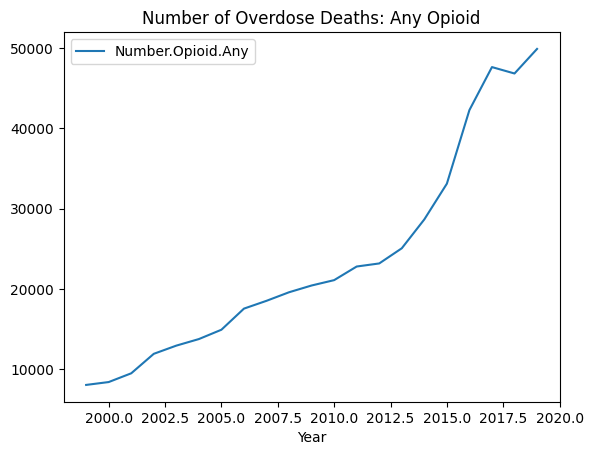

In [5]:
#make a dataframe with number of opioid any column.
drug_opioid_any=drug[['Year','Number.Opioid.Any']].copy()
drug_opioid_any.plot(x='Year', y='Number.Opioid.Any')
plt.title('Number of Overdose Deaths: Any Opioid')

Text(0.5, 1.0, 'Number of Overdose Deaths: Prescription')

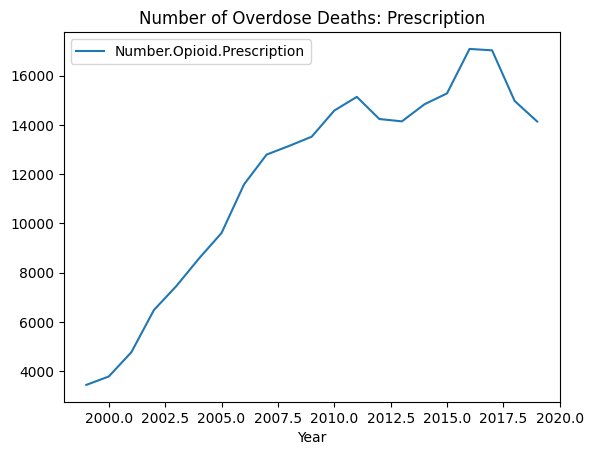

In [6]:
#make a dataframe with number of opioid prescription column.
drug_opioid_prescription=drug[['Year','Number.Opioid.Prescription']].copy()
drug_opioid_prescription.plot(x='Year', y='Number.Opioid.Prescription')
plt.title('Number of Overdose Deaths: Prescription')

Text(0.5, 1.0, 'Number of Overdose Deaths: Synthetic')

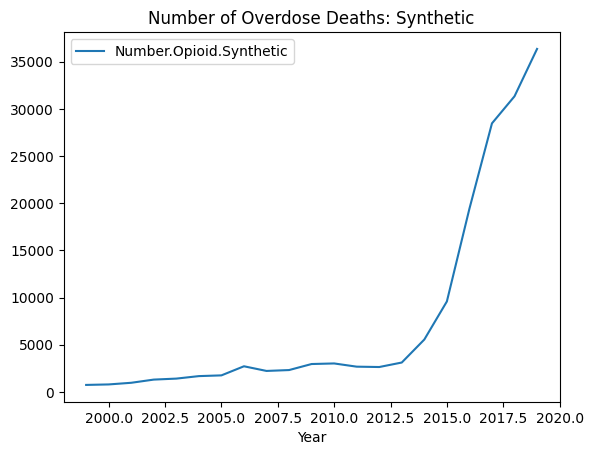

In [7]:
#make a dataframe with number of opioid synthetic column.
drug_opioid_synthetic=drug[['Year','Number.Opioid.Synthetic']].copy()
drug_opioid_synthetic.plot(x='Year', y='Number.Opioid.Synthetic')
plt.title('Number of Overdose Deaths: Synthetic')

Text(0.5, 1.0, 'Number of Overdose Deaths: Heroin')

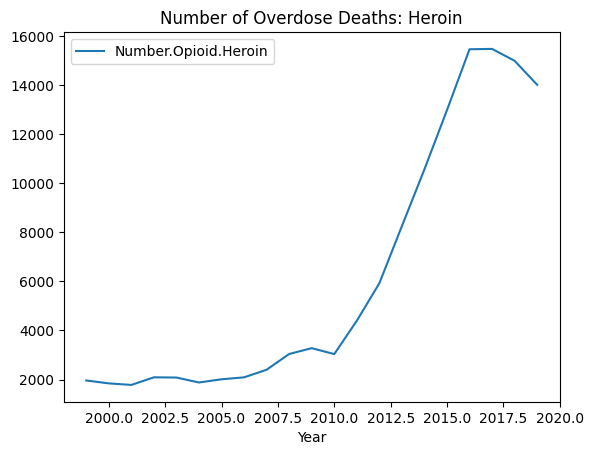

In [8]:
#make a dataframe with number of opioid heroin column.
drug_opioid_heroin=drug[['Year','Number.Opioid.Heroin']].copy()
drug_opioid_heroin.plot(x='Year', y='Number.Opioid.Heroin')
plt.title('Number of Overdose Deaths: Heroin')

Text(0.5, 1.0, 'Number of Overdose Deaths: Cocaine')

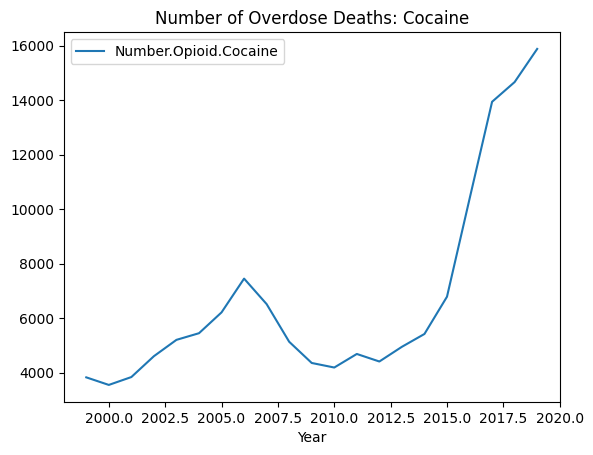

In [9]:
#make a dataframe with number of opioid cocaine column.
drug_opioid_cocaine=drug[['Year','Number.Opioid.Cocaine']].copy()
drug_opioid_cocaine.plot(x='Year', y='Number.Opioid.Cocaine')
plt.title('Number of Overdose Deaths: Cocaine')

## III. Results

Now that I spent enough time looking through the dataset, I began the main section of analysis to answer the research question. As my first step, I converted columns of dataframe into lists. As the x-axis of each graph is the year, I created a new list called 'year' from the 'year' column in drug dataset. Then, for each group of race and sex, I repeated converting dataframe into lists. Then I plotted multiple lines in each graph of sex and race to see the growth easily. 

### Any Opioid Overdose Death Rate by Sex

Text(0.5, 1.0, 'Any Opioid Overdose Death Rate by Sex')

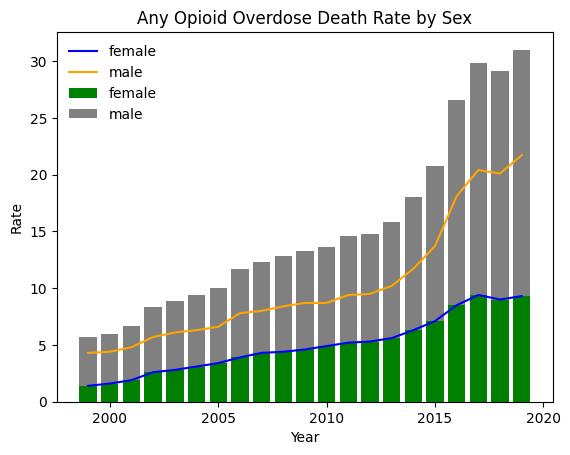

In [10]:
#convert the Rate.Opioid.Any.Sex.Female and Rate.Opioid.Any.Sex.Male columns to lists
year=drug['Year'].values.tolist()
rate_any_female=drug['Rate.Opioid.Any.Sex.Female'].values.tolist()
rate_any_male=drug['Rate.Opioid.Any.Sex.Male'].values.tolist()

plt.bar(year, rate_any_female, color='green', label='female')
plt.bar(year, rate_any_male, bottom=rate_any_female, color='grey',label='male')
plt.plot(year, rate_any_female, label='female', color='blue')
plt.plot(year, rate_any_male, label='male', color='orange')
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Any Opioid Overdose Death Rate by Sex')


### Any Opioid Overdose Death Growth by Race 

Text(0, 0.5, 'Rate')

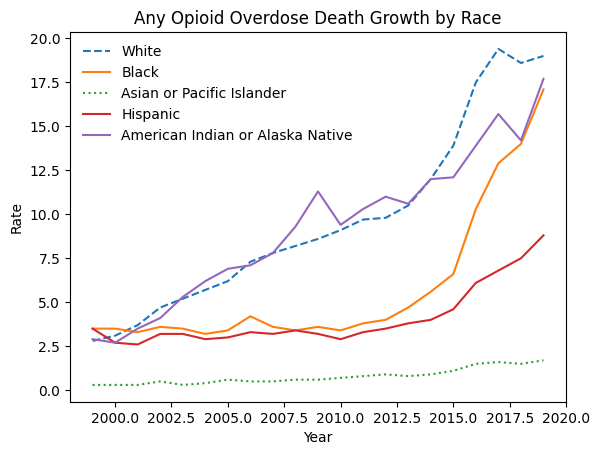

In [11]:
#convert the Rate.Opioid.Any columns for races to lists
rate_any_white=drug['Rate.Opioid.Any.Race.White'].values.tolist()
rate_any_black=drug['Rate.Opioid.Any.Race.Black'].values.tolist()
rate_any_asian=drug['Rate.Opioid.Any.Race.Asian or Pacific Islander'].values.tolist()
rate_any_hispanic=drug['Rate.Opioid.Any.Race.Hispanic'].values.tolist()
rate_any_indian=drug['Rate.Opioid.Any.Race.American Indian or Alaska Native'].values.tolist()

plt.plot(year,rate_any_white, label='White', linestyle='--')
plt.plot(year,rate_any_black, label='Black')
plt.plot(year,rate_any_asian, label='Asian or Pacific Islander', linestyle=':')
plt.plot(year,rate_any_hispanic, label='Hispanic')
plt.plot(year,rate_any_indian, label='American Indian or Alaska Native')

plt.legend(loc='upper left', frameon=False)
plt.title('Any Opioid Overdose Death Growth by Race')
plt.xlabel('Year')
plt.ylabel('Rate')

Now that I observed the overall picture of the all opioid overdose growth, I started to dig deeper into analyzing the overdose growth of a specific opioid drug based on sex and race. The process is somewhat different. First, I obtained data from each column in the dataframe called drug. Then I added these values to a new empty list and created another empty list to store calcuated slopes. Next, I wrote a for loop that goes through each group's values, makes a scatterplot, calculate slopes using pyplot, plots the linear regression and adds the slopes to a list. Lastly, I changed design of the graph by adding title for each axis, main title and legend.

### Prescription Overdose Death Growth by Sex 

[0.1657142857142838, 0.19051948051947903]


Text(0.5, 1.0, 'Prescription Overdose Death Growth by Sex')

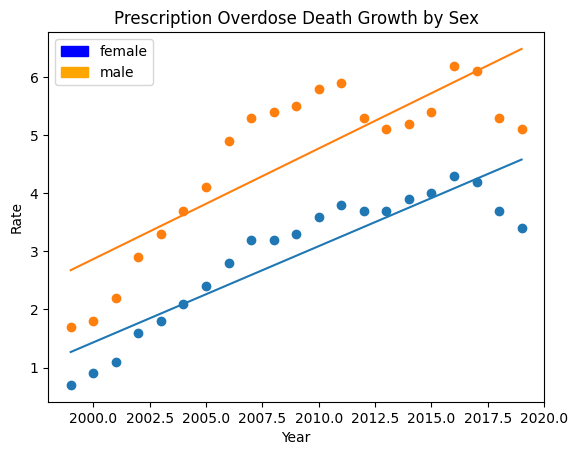

In [12]:
#get data from each column.
rate_presc_female=drug['Rate.Opioid.Prescription.Sex.Female']
rate_presc_male=drug['Rate.Opioid.Prescription.Sex.Male']
rate_presc_sex=[]
rate_presc_sex.append(rate_presc_female)
rate_presc_sex.append(rate_presc_male)
#empty list for slopes.
slope_presc_sex=[]

for i in rate_presc_sex:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_presc_sex.append(a)
    plt.plot(x, a*np.array(x)+b)
    #plot the linear regression
print(slope_presc_sex)

# Creating legend with color box
presc_fem = mpatches.Patch(color='blue', label='female')
presc_male = mpatches.Patch(color='orange', label='male')
plt.legend(handles=[presc_fem,presc_male])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Prescription Overdose Death Growth by Sex')

In order to determine whether linear or polynomial regression is better, I created a graph of polynomial regression below. Since slope is only applicable for linear regression, I took a derivative which turned out to be -0.02592 and -0.04141 for female and male groups. While according to the shape, this negative slope might be true, in terms of the overall trend, the rate of overdose death due to prescription opioid definitely grew over the years. Therefore, for the remainder of analysis, I decided to use linear regression which would provide the relationship between the rate and year in a simplest manner. 

### Prescription Overdose Death Growth by Sex (POLYNOMIAL REGRESSION)

 
-0.02592 x + 52.24
 
-0.04141 x + 83.38


Text(0.5, 1.0, 'Prescription Overdose Death Growth by Sex (POLYNOMIAL REGRESSION)')

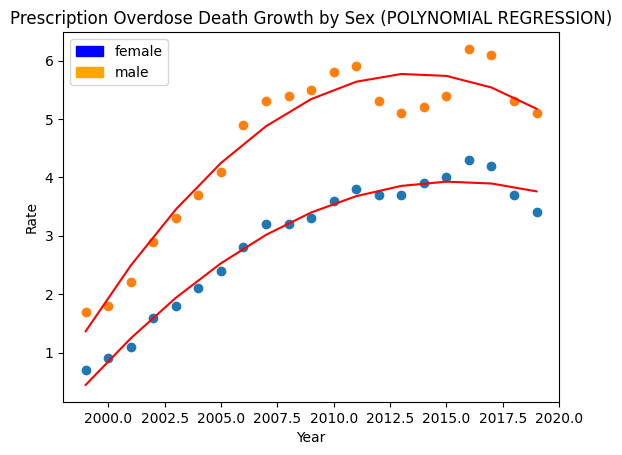

In [13]:
rate_presc_females=drug['Rate.Opioid.Prescription.Sex.Female']
rate_presc_males=drug['Rate.Opioid.Prescription.Sex.Male']
rate_presc_sexual=[]
rate_presc_sexual.append(rate_presc_females)
rate_presc_sexual.append(rate_presc_males)

#create polynomial regression.
for i in rate_presc_sexual:
    x=year
    y=i
    plt.scatter(x,y)
    poly_fit=np.poly1d(np.polyfit(x,y,2))
    #slope is the derivative of polynomial regression.
    slope= poly_fit.deriv()
    xx = np.linspace(1999, 2019, 11)
    plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
    print(slope)

# Creating legend with color box
presc_fem = mpatches.Patch(color='blue', label='female')
presc_male = mpatches.Patch(color='orange', label='male')
plt.legend(handles=[presc_fem,presc_male])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Prescription Overdose Death Growth by Sex (POLYNOMIAL REGRESSION)')

For the following analysis by race, some group data is missing unfortuantely. For the prescription overdose death growth below, data of Asian or Pacific Islanders is not available. For the sake of this project, I will still analyze all the avilable data. However, this can be a factor for improvement by compiling or finding a more comprehensive dataset in the future. 

### Prescription Overdose Death Growth by Race

[0.2529870129870105, 0.13389610389610124, 0.039999999999998814, 0.2605194805194794]


Text(0.5, 1.0, 'Prescription Overdose Death Growth by Race')

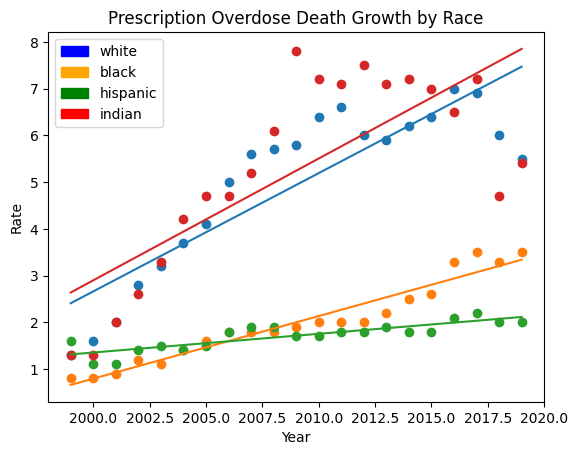

In [14]:
#get data from each column (Asian or Pacific Islander data is missing).
rate_presc_white=drug['Rate.Opioid.Prescription.Race.White']
rate_presc_black=drug['Rate.Opioid.Prescription.Race.Black']
rate_presc_hispanic=drug['Rate.Opioid.Prescription.Race.Hispanic']
rate_presc_indian=drug['Rate.Opioid.Prescription.Race.American Indian or Alaska Native']

#empty list for prescription overdose death rate by race.
rate_presc_race=[]
rate_presc_race.append(rate_presc_white)
rate_presc_race.append(rate_presc_black)
rate_presc_race.append(rate_presc_hispanic)
rate_presc_race.append(rate_presc_indian)

#empty list for slopes.
slope_presc_race=[]

for i in rate_presc_race:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_presc_race.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_presc_race)


# Creating legend with color box
presc_white = mpatches.Patch(color='blue', label='white')
presc_black = mpatches.Patch(color='orange', label='black')
presc_hispanic = mpatches.Patch(color='green', label='hispanic')
presc_indian = mpatches.Patch(color='red', label='indian')
plt.legend(handles=[presc_white,presc_black,presc_hispanic,presc_indian])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Prescription Overdose Death Growth by Race')

### Synthetic Overdose Death Growth by Sex

[0.23649350649350034, 0.6229870129869955]


Text(0.5, 1.0, 'Synthetic Overdose Death Growth by Sex')

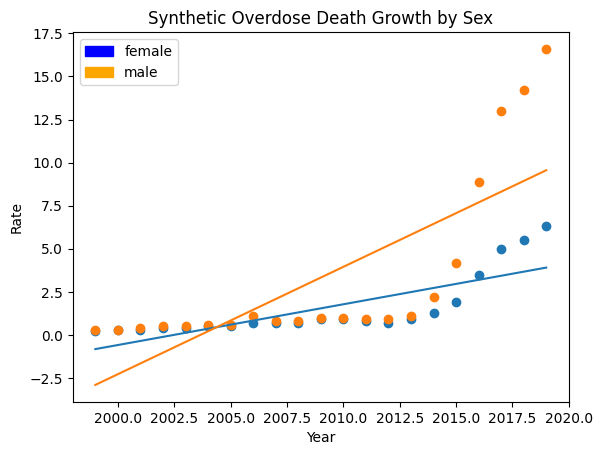

In [15]:
#get data from each column.
rate_synth_female=drug['Rate.Opioid.Synthetic.Sex.Female']
rate_synth_male=drug['Rate.Opioid.Synthetic.Sex.Male']
#empty list for synthetic overdose death rate by sex.
rate_synth_sex=[]
rate_synth_sex.append(rate_synth_female)
rate_synth_sex.append(rate_synth_male)

#empty list for slopes.
slope_synth_sex=[]

for i in rate_synth_sex:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_synth_sex.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_synth_sex)

# Creating legend with color box
synth_fem = mpatches.Patch(color='blue', label='female')
synth_male = mpatches.Patch(color='orange', label='male')
plt.legend(handles=[synth_fem,synth_male])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Synthetic Overdose Death Growth by Sex')

### Synthetic Overdose Death Growth by Race

[0.5502597402597247, 0.47181818181816904, 0.20402597402596873]


Text(0.5, 1.0, 'Synthetic Overdose Death Growth by Race')

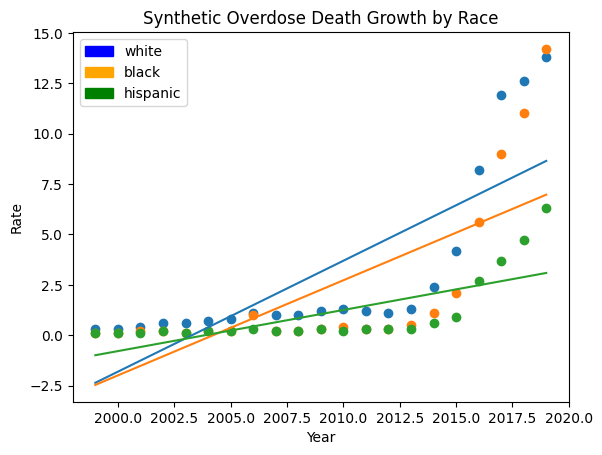

In [16]:
#get data from each column (Asian or Pacific Islander and American Indian or Native Alaskan data are missing).
rate_synth_white=drug['Rate.Opioid.Synthetic.Race.White']
rate_synth_black=drug['Rate.Opioid.Synthetic.Race.Black']
rate_synth_hispanic=drug['Rate.Opioid.Synthetic.Race.Hispanic']

#empty list for synthetic overdose death rate by race.
rate_synth_race=[]
rate_synth_race.append(rate_synth_white)
rate_synth_race.append(rate_synth_black)
rate_synth_race.append(rate_synth_hispanic)

#empty list for slopes.
slope_synth_race=[]

for i in rate_synth_race:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_synth_race.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_synth_race)


# Creating legend with color box
synth_white = mpatches.Patch(color='blue', label='white')
synth_black = mpatches.Patch(color='orange', label='black')
synth_hispanic = mpatches.Patch(color='green', label='hispanic')
plt.legend(handles=[synth_white,synth_black,synth_hispanic])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Synthetic Overdose Death Growth by Race')

### Heroin Overdose Death Growth by Sex

[0.12532467532467176, 0.35545454545453514]


Text(0.5, 1.0, 'Heroin Overdose Death Growth by Sex')

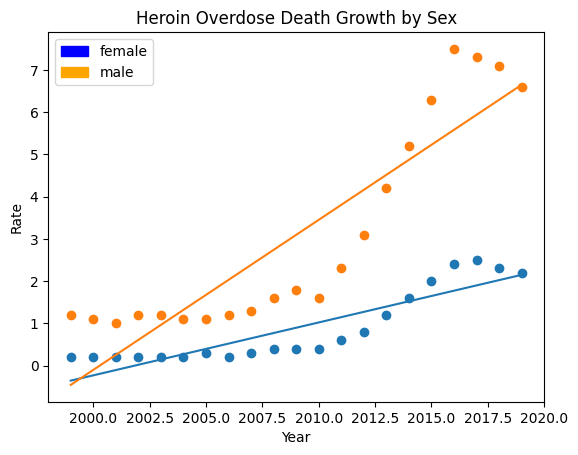

In [17]:
#get data from each column.
rate_heroin_female=drug['Rate.Opioid.Heroin.Sex.Female']
rate_heroin_male=drug['Rate.Opioid.Heroin.Sex.Male']
#empty list for heroin overdose death rate by sex.
rate_heroin_sex=[]
rate_heroin_sex.append(rate_heroin_female)
rate_heroin_sex.append(rate_heroin_male)

#empty list for slopes.
slope_heroin_sex=[]

for i in rate_heroin_sex:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_heroin_sex.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_heroin_sex)

# Creating legend with color box
heroin_fem = mpatches.Patch(color='blue', label='female')
heroin_male = mpatches.Patch(color='orange', label='male')
plt.legend(handles=[heroin_fem,heroin_male])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Heroin Overdose Death Growth by Sex')

### Heroin Overdose Death Growth by Race

[0.310909090909082, 0.21597402597401968, 0.11311688311687951]


Text(0.5, 1.0, 'Heroin Overdose Death Growth by Race')

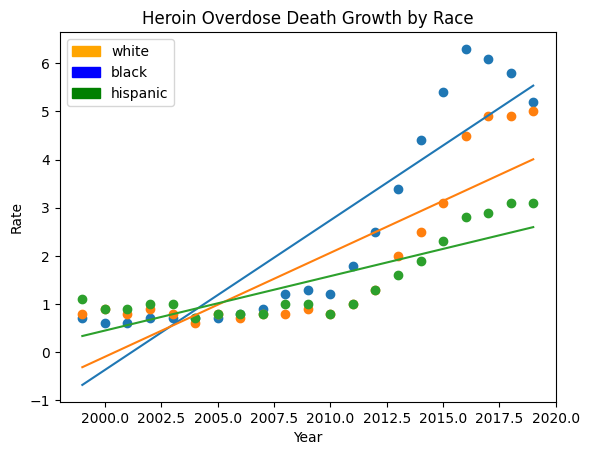

In [18]:
#get data from each column (Asian or Pacific Islander and American Indian or Native Alaskan data are missing).
rate_heroin_white=drug['Rate.Opioid.Heroin.Race.White']
rate_heroin_black=drug['Rate.Opioid.Heroin.Race.Black']
rate_heroin_hispanic=drug['Rate.Opioid.Heroin.Race.Hispanic']

#empty list for heroin overdose death rate by race.
rate_heroin_race=[]
rate_heroin_race.append(rate_heroin_white)
rate_heroin_race.append(rate_heroin_black)
rate_heroin_race.append(rate_heroin_hispanic)

#empty list for slopes.
slope_heroin_race=[]

for i in rate_heroin_race:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_heroin_race.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_heroin_race)


# Creating legend with color box
heroin_white = mpatches.Patch(color='orange', label='white')
heroin_black = mpatches.Patch(color='blue', label='black')
heroin_hispanic = mpatches.Patch(color='green', label='hispanic')
plt.legend(handles=[heroin_white,heroin_black,heroin_hispanic])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Heroin Overdose Death Growth by Race')


### Cocaine Overdose Death Growth by Sex

[0.07675324675324491, 0.16818181818181396]


Text(0.5, 1.0, 'Cocaine Overdose Death Growth by Sex')

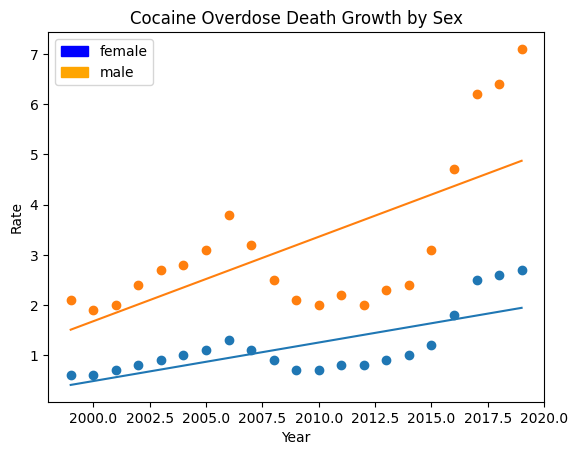

In [19]:
#get data from each column.
rate_cocaine_female=drug['Rate.Opioid.Cocaine.Sex.Female']
rate_cocaine_male=drug['Rate.Opioid.Cocaine.Sex.Male']
#empty list for cocaine overdose death rate by sex.
rate_cocaine_sex=[]
rate_cocaine_sex.append(rate_cocaine_female)
rate_cocaine_sex.append(rate_cocaine_male)

#empty list for slopes.
slope_cocaine_sex=[]

for i in rate_cocaine_sex:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_cocaine_sex.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_cocaine_sex)

# Creating legend with color box
cocaine_fem = mpatches.Patch(color='blue', label='female')
cocaine_male = mpatches.Patch(color='orange', label='male')
plt.legend(handles=[cocaine_fem,cocaine_male])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Cocaine Overdose Death Growth by Sex')

### Cocaine Overdose Death Growth by Race 

[0.14194805194804838, 0.1963636363636313, 0.045584415584413736, 0.07948051948051858]


Text(0.5, 1.0, 'Cocaine Overdose Death Growth by Race')

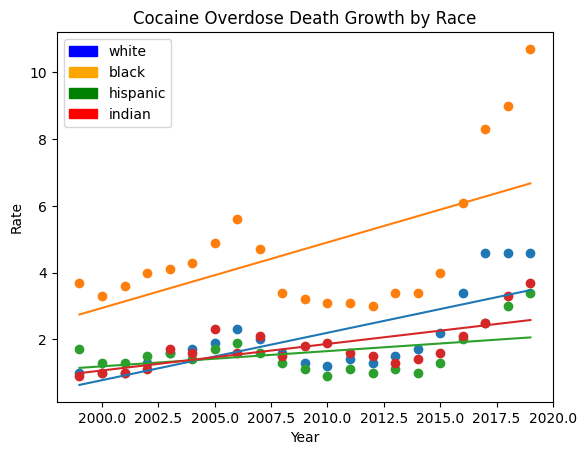

In [20]:
#get data from each column (Asian or Pacific Islander data is missing).
rate_cocaine_white=drug['Rate.Opioid.Cocaine.Race.White']
rate_cocaine_black=drug['Rate.Opioid.Cocaine.Race.Black']
rate_cocaine_hispanic=drug['Rate.Opioid.Cocaine.Race.Hispanic']
rate_cocaine_indian=drug['Rate.Opioid.Cocaine.Race.American Indian or Alaska Native']

#empty list for cocaine overdose death rate by race.
rate_cocaine_race=[]
rate_cocaine_race.append(rate_cocaine_white)
rate_cocaine_race.append(rate_cocaine_black)
rate_cocaine_race.append(rate_cocaine_hispanic)
rate_cocaine_race.append(rate_cocaine_indian)

#empty list for slopes.
slope_cocaine_race=[]

for i in rate_cocaine_race:
    x=year
    y=i
    #make a scatterplot
    plt.scatter(x,y)
    #calculate slope
    a,b=np.polyfit(x,y,1)
    slope_cocaine_race.append(a)
    #plot the linear regression
    plt.plot(x, a*np.array(x)+b)
print(slope_cocaine_race)


# Creating legend with color box
cocaine_white = mpatches.Patch(color='blue', label='white')
cocaine_black = mpatches.Patch(color='orange', label='black')
cocaine_hispanic = mpatches.Patch(color='green', label='hispanic')
cocaine_indian = mpatches.Patch(color='red', label='indian')
plt.legend(handles=[cocaine_white,cocaine_black,cocaine_hispanic,cocaine_indian])
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Cocaine Overdose Death Growth by Race')

Now that I have calcuated slopes of all the groups, I compiled them into two separate dataframe (one for sex and another for race).

### Dataframe #1: Growth Rate of Overdose Death by Sex

In [21]:
#create a dataframe with slopes of all drugs by sex.
overdose_by_sex= {'Sex':['Female','Male'],
        'Prescription':slope_presc_sex,
        'Synthetic':slope_synth_sex,
        'Heroin':slope_heroin_sex,
        'Cocaine':slope_cocaine_sex }

overdose_sex = pd.DataFrame(overdose_by_sex)
print(overdose_sex)


      Sex  Prescription  Synthetic    Heroin   Cocaine
0  Female      0.165714   0.236494  0.125325  0.076753
1    Male      0.190519   0.622987  0.355455  0.168182


### Dataframe #2: Growth Rate of Overdose Death by Race

In [22]:
#create a dataframe with slopes of all drugs by race (I excluded Asian or Pacific Islander since there is no data on them for any of drugs).
#For synthetic and heroin, no data of American Indian or Alaska Native; Thus, adding NaN value to make the array length equal.
overdose_by_race= {'Race':['White','Black','Hispanic','American Indian or Alaska Native'],
        'Prescription':slope_presc_race,
        'Synthetic':[0.675, 0.705, 0.31, 'NaN'],
        'Heroin':[0.225, 0.21000000000000002, 0.1, 'NaN'],
        'Cocaine':slope_cocaine_race }

overdose_race = pd.DataFrame(overdose_by_race)
print(overdose_race)

                               Race  Prescription Synthetic Heroin   Cocaine
0                             White      0.252987     0.675  0.225  0.141948
1                             Black      0.133896     0.705   0.21  0.196364
2                          Hispanic      0.040000      0.31    0.1  0.045584
3  American Indian or Alaska Native      0.260519       NaN    NaN  0.079481


## IV. Discussion


what does your analysis show

 what is the big picture

 how are
these findings useful?

limitation :- if possible, you could try to quantify a goodness-of-fit (e.g. looking at R-squared score)

conclusion